In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('/content/ejaj.csv')
df.head()

,Unit Weight (kN/m³),Cohesion (kPa),Internal Friction Angle (°),Slope Angle (°),Slope Height (m),Pore Water Pressure Ratio,Reinforcement Type,Reinforcement Numeric,Factor of Safety (FS)
0,18.745401,21.813837,38.249958,41.907228,18.451042,0.847237,Drainage,3,2.613692
1,24.507143,19.981044,24.612800,32.964623,9.266800,0.494517,Geosynthetics,2,2.241626
2,22.319939,12.926926,28.665992,58.224926,10.686165,0.195466,Retaining Wall,0,1.568244
3,20.986585,32.327000,36.582016,20.948923,13.130201,0.736642,Drainage,3,3.000000
4,16.560186,26.448087,32.052234,39.392821,14.164400,0.418678,Soil Nailing,1,3.000000


In [ ]:
df.shape

(10000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unit Weight (kN/m³)          10000 non-null  float64
 1   Cohesion (kPa)               10000 non-null  float64
 2   Internal Friction Angle (°)  10000 non-null  float64
 3   Slope Angle (°)              10000 non-null  float64
 4   Slope Height (m)             10000 non-null  float64
 5   Pore Water Pressure Ratio    10000 non-null  float64
 6   Reinforcement Type           10000 non-null  object 
 7   Reinforcement Numeric        10000 non-null  int64  
 8   Factor of Safety (FS)        10000 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 703.3+ KB


In [ ]:
df.describe()

,Unit Weight (kN/m³),Cohesion (kPa),Internal Friction Angle (°),Slope Angle (°),Slope Height (m),Pore Water Pressure Ratio,Reinforcement Numeric,Factor of Safety (FS)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,19.941596,27.703844,32.501260,34.935669,27.358871,0.503145,1.494300,2.545083
std,2.876301,13.018255,7.169344,14.449730,13.017788,0.288341,1.120399,0.659996
min,15.000116,5.007099,20.001203,10.000277,5.000753,0.000008,0.000000,0.500000
25%,17.463289,16.427561,26.343698,22.342862,15.992250,0.256956,0.000000,2.125824
50%,19.925286,27.765355,32.551702,35.001512,27.217274,0.506090,1.000000,3.000000
75%,22.400063,39.041565,38.616846,47.355813,38.771467,0.753446,3.000000,3.000000
max,24.997177,49.996617,44.997524,59.989469,49.998747,0.999940,3.000000,3.000000


<Axes: >

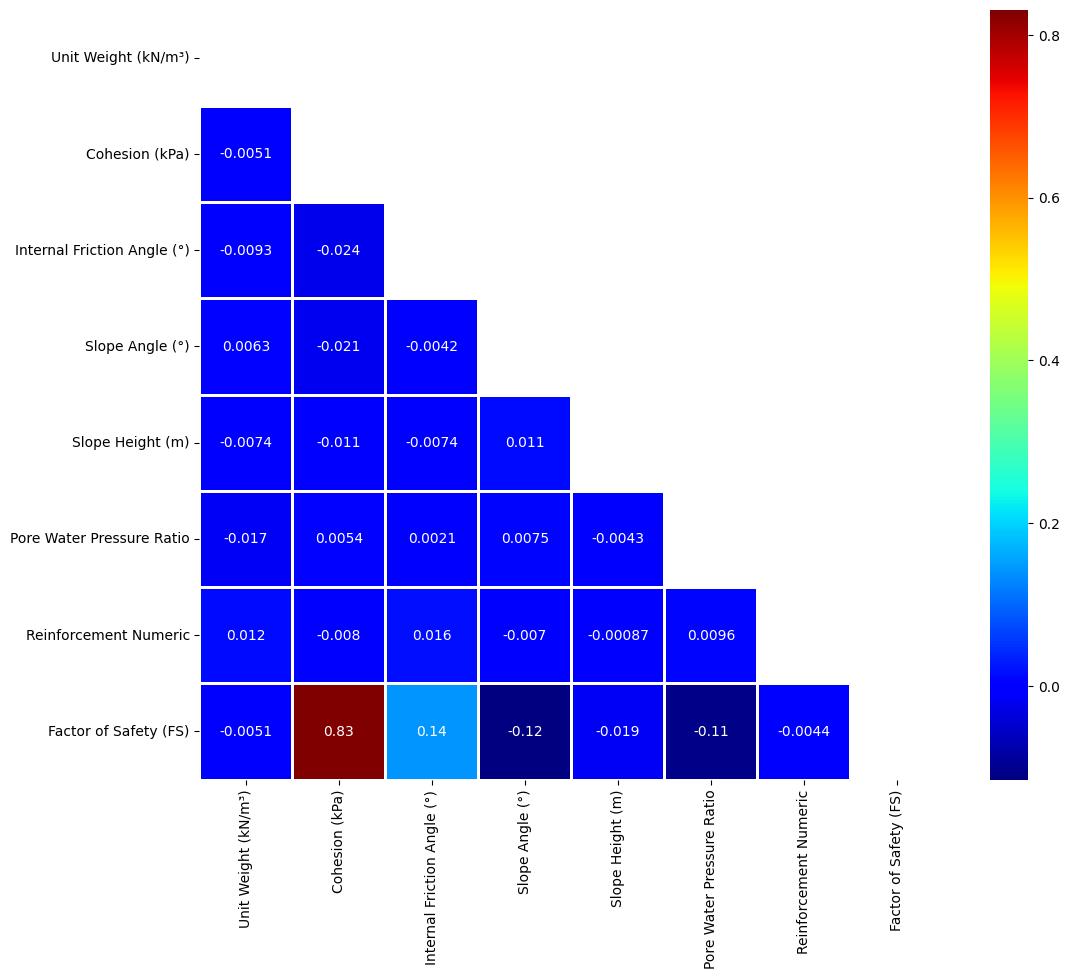

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))

# Select only numerical columns for correlation calculation
df_numeric = df.select_dtypes(include=np.number)

mask = np.zeros_like(df_numeric.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=df_numeric.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)

DECISION TREE REGRESSOR ANALYSIS


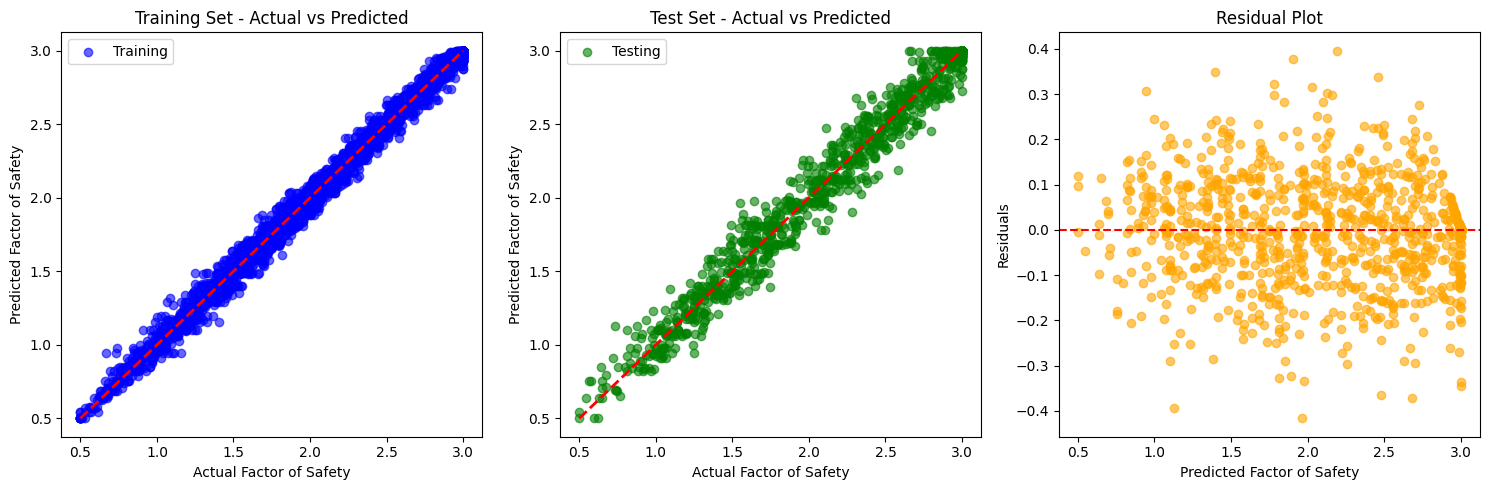


3. FEATURE IMPORTANCE (Tabular)
                    Feature  Importance
             Cohesion (kPa)    0.908567
Internal Friction Angle (°)    0.052799
            Slope Angle (°)    0.019407
  Pore Water Pressure Ratio    0.018587
        Unit Weight (kN/m³)    0.000284
           Slope Height (m)    0.000178
      Reinforcement Numeric    0.000177


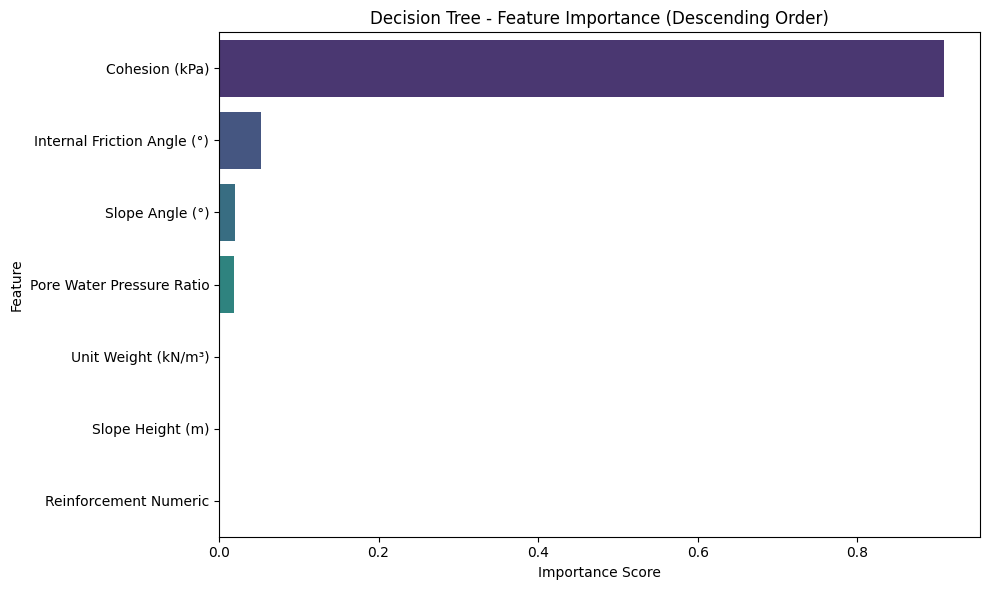


4. ACCURACY METRICS
            Metric  Training  Testing
              RMSE  0.035945 0.082170
               MAE  0.018043 0.043495
          R² Score  0.997047 0.984206
Execution Time (s)  0.101897 0.101897

5. P-VALUE ANALYSIS
P-Values for Features:
                    Feature       P_Value  Significant
             Cohesion (kPa)  0.000000e+00         True
Internal Friction Angle (°) 2.019107e-175         True
  Pore Water Pressure Ratio  5.999735e-86         True
            Slope Angle (°)  1.194833e-63         True
           Slope Height (m)  5.726001e-01        False
      Reinforcement Numeric  6.978170e-01        False
        Unit Weight (kN/m³)  9.679345e-01        False

6. COMBINED FEATURE ANALYSIS
Combined Feature Analysis (Importance + P-Value):
                    Feature  Importance       P_Value  Significant  Combined_Score
             Cohesion (kPa)    0.908567  0.000000e+00         True             1.0
Internal Friction Angle (°)    0.052799 2.019107e-175      

In [ ]:
# Decision Tree Regressor Analysis for Slope Stability Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sma
from scipy import stats
import time
import warnings
warnings.filterwarnings('ignore')

# Load your dataset (replace 'your_dataset.csv' with actual file path)
# df = pd.read_csv('your_dataset.csv')

# Feature columns (excluding target)
feature_cols = ['Unit Weight (kN/m³)', 'Cohesion (kPa)', 'Internal Friction Angle (°)',
                'Slope Angle (°)', 'Slope Height (m)', 'Pore Water Pressure Ratio',
                'Reinforcement Numeric']

# Prepare features and target
X = df[feature_cols]
y = df['Factor of Safety (FS)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_cols)

# Reset the index of both X_train_scaled and y_train to ensure they are aligned for statsmodels
X_train_scaled = X_train_scaled.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# 1. Train Decision Tree Regressor
print("=" * 60)
print("DECISION TREE REGRESSOR ANALYSIS")
print("=" * 60)

start_time = time.time()
dt_model = DecisionTreeRegressor(random_state=42, max_depth=10, min_samples_split=5)
dt_model.fit(X_train_scaled, y_train)
execution_time = time.time() - start_time

# Make predictions
y_pred_train = dt_model.predict(X_train_scaled)
y_pred_test = dt_model.predict(X_test_scaled)

# 2. Regression Curve
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_train, y_pred_train, alpha=0.6, color='blue', label='Training')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Factor of Safety')
plt.ylabel('Predicted Factor of Safety')
plt.title('Training Set - Actual vs Predicted')
plt.legend()

plt.subplot(1, 3, 2)
# Need to reset index of y_test as well for plotting against y_pred_test (which has a default index)
y_test_reset = y_test.reset_index(drop=True)
plt.scatter(y_test_reset, y_pred_test, alpha=0.6, color='green', label='Testing')
plt.plot([y_test_reset.min(), y_test_reset.max()], [y_test_reset.min(), y_test_reset.max()], 'r--', lw=2)
plt.xlabel('Actual Factor of Safety')
plt.ylabel('Predicted Factor of Safety')
plt.title('Test Set - Actual vs Predicted')
plt.legend()

plt.subplot(1, 3, 3)
# Calculate residuals using the reset index for y_test
residuals = y_test_reset - y_pred_test
plt.scatter(y_pred_test, residuals, alpha=0.6, color='orange')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Factor of Safety')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

# 3. Feature Importance Analysis
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n3. FEATURE IMPORTANCE (Tabular)")
print("=" * 50)
print(feature_importance.to_string(index=False))

# Feature Importance Graph
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Decision Tree - Feature Importance (Descending Order)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# 4. Calculate Accuracy Metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test)) # y_test indices might still differ, but mean_squared_error works with value arrays
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test) # y_test indices might still differ, but mean_absolute_error works with value arrays
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test) # y_test indices might still differ, but r2_score works with value arrays

# Create accuracy metrics table
accuracy_metrics = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R² Score', 'Execution Time (s)'],
    'Training': [train_rmse, train_mae, train_r2, execution_time],
    'Testing': [test_rmse, test_mae, test_r2, execution_time]
})

print("\n4. ACCURACY METRICS")
print("=" * 40)
print(accuracy_metrics.to_string(index=False))

# 5. P-value Analysis
print("\n5. P-VALUE ANALYSIS")
print("=" * 40)

# Use Linear Regression for p-value calculation (as tree models don't have built-in p-values)
# X_train_scaled and y_train now have aligned indices due to reset_index
X_with_constant = sma.add_constant(X_train_scaled)
ols_model = sma.OLS(y_train, X_with_constant).fit()
p_values = ols_model.pvalues[1:]  # Exclude intercept

# Create p-value dataframe
p_value_df = pd.DataFrame({
    'Feature': feature_cols,
    'P_Value': p_values.values,
    'Significant': p_values.values < 0.05
}).sort_values('P_Value')

print("P-Values for Features:")
print(p_value_df.to_string(index=False))

# 6. Combined Feature Selection Analysis
print("\n6. COMBINED FEATURE ANALYSIS")
print("=" * 50)

# Merge feature importance and p-values
combined_analysis = pd.merge(
    feature_importance,
    p_value_df[['Feature', 'P_Value', 'Significant']],
    on='Feature'
)

# Rank features based on importance and significance
combined_analysis['Importance_Rank'] = combined_analysis['Importance'].rank(ascending=False)
combined_analysis['PValue_Rank'] = combined_analysis['P_Value'].rank(ascending=True)
combined_analysis['Combined_Score'] = (combined_analysis['Importance_Rank'] + combined_analysis['PValue_Rank']) / 2
combined_analysis = combined_analysis.sort_values('Combined_Score')

print("Combined Feature Analysis (Importance + P-Value):")
print(combined_analysis[['Feature', 'Importance', 'P_Value', 'Significant', 'Combined_Score']].to_string(index=False))

# Select top features (p-value < 0.05 and high importance)
top_features = combined_analysis[
    (combined_analysis['Significant'] == True) &
    (combined_analysis['Importance'] > combined_analysis['Importance'].median())
]['Feature'].tolist()

print(f"\nTop Important Features (Significant p-value + High Importance):")
for i, feature in enumerate(top_features, 1):
    print(f"{i}. {feature}")

print(f"\nDecision Tree Model Performance Summary:")
print(f"- Test R² Score: {test_r2:.4f}")
print(f"- Test RMSE: {test_rmse:.4f}")
print(f"- Number of significant features: {len(top_features)}")
print(f"- Execution Time: {execution_time:.4f} seconds")

RANDOM FOREST REGRESSOR ANALYSIS


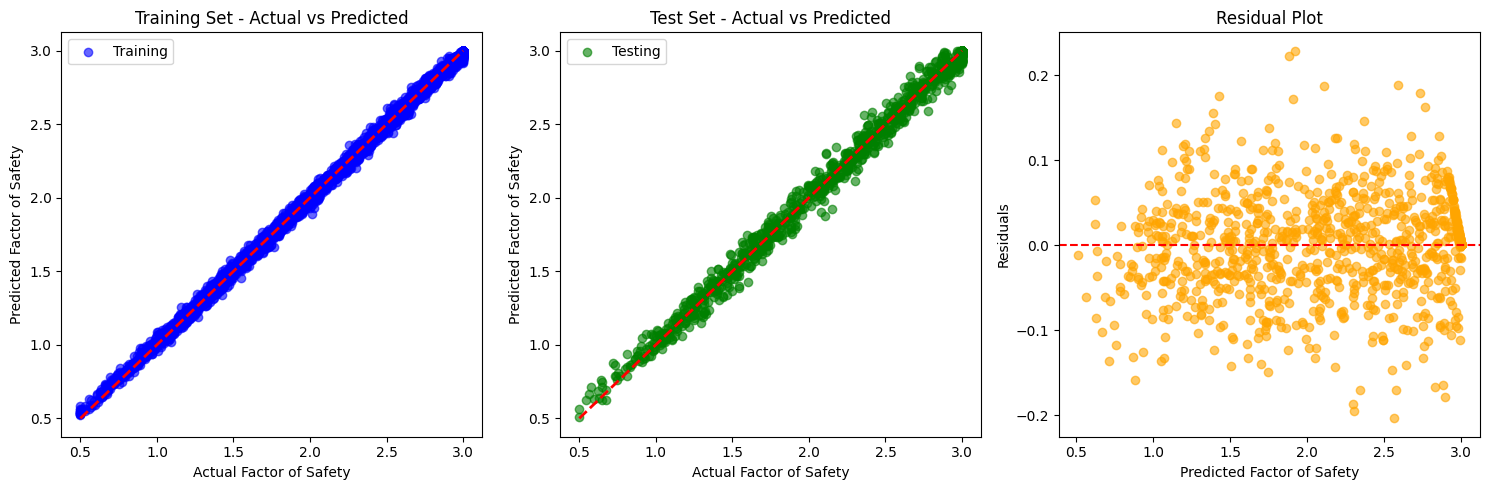


3. FEATURE IMPORTANCE (Tabular)
                    Feature  Importance
             Cohesion (kPa)    0.908193
Internal Friction Angle (°)    0.052762
            Slope Angle (°)    0.018950
  Pore Water Pressure Ratio    0.018540
        Unit Weight (kN/m³)    0.000656
           Slope Height (m)    0.000650
      Reinforcement Numeric    0.000249


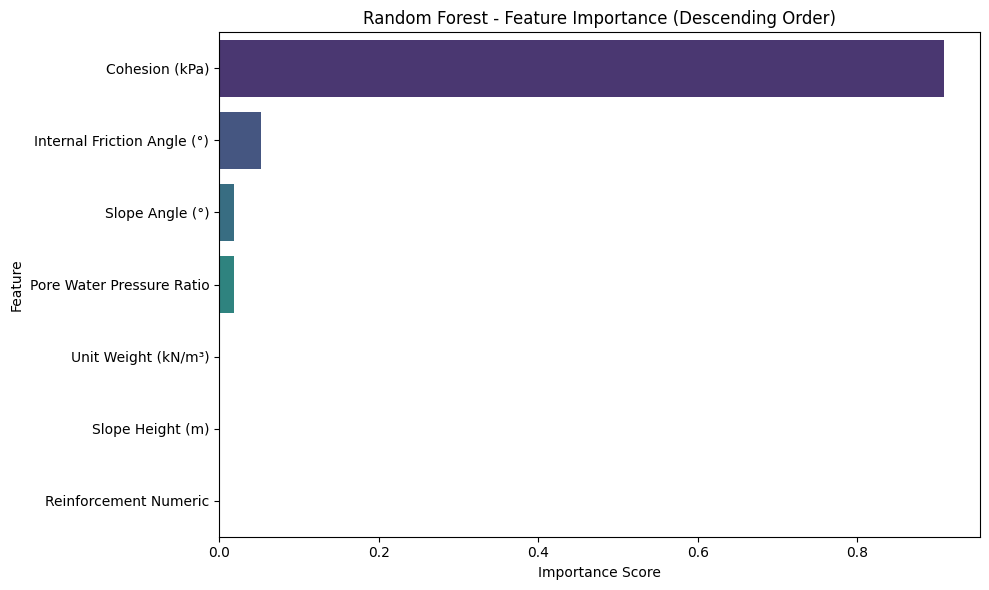


4. ACCURACY METRICS
            Metric  Training  Testing
              RMSE  0.018725 0.042208
               MAE  0.010117 0.022878
          R² Score  0.999199 0.995833
Execution Time (s)  4.243867 4.243867

5. P-VALUE ANALYSIS
P-Values for Features:
                    Feature       P_Value  Significant
             Cohesion (kPa)  0.000000e+00         True
Internal Friction Angle (°) 2.019107e-175         True
  Pore Water Pressure Ratio  5.999735e-86         True
            Slope Angle (°)  1.194833e-63         True
           Slope Height (m)  5.726001e-01        False
      Reinforcement Numeric  6.978170e-01        False
        Unit Weight (kN/m³)  9.679345e-01        False

6. COMBINED FEATURE ANALYSIS
Combined Feature Analysis (Importance + P-Value):
                    Feature  Importance       P_Value  Significant  Combined_Score
             Cohesion (kPa)    0.908193  0.000000e+00         True             1.0
Internal Friction Angle (°)    0.052762 2.019107e-175      

In [ ]:
# Random Forest Regressor Analysis for Slope Stability Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sma
from scipy import stats
import time
import warnings
warnings.filterwarnings('ignore')

# Load your dataset (replace 'your_dataset.csv' with actual file path)
# df = pd.read_csv('your_dataset.csv')

# Feature columns (excluding target)
feature_cols = ['Unit Weight (kN/m³)', 'Cohesion (kPa)', 'Internal Friction Angle (°)',
                'Slope Angle (°)', 'Slope Height (m)', 'Pore Water Pressure Ratio',
                'Reinforcement Numeric']

# Prepare features and target
X = df[feature_cols]
y = df['Factor of Safety (FS)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_cols)

# Reset the index of both X_train_scaled and y_train to ensure they are aligned for statsmodels
X_train_scaled = X_train_scaled.reset_index(drop=True)
# Reset the index of y_train to align with X_train_scaled for statsmodels OLS
y_train = y_train.reset_index(drop=True)


# 1. Train Random Forest Regressor
print("=" * 60)
print("RANDOM FOREST REGRESSOR ANALYSIS")
print("=" * 60)

start_time = time.time()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15, min_samples_split=5)
rf_model.fit(X_train_scaled, y_train)
execution_time = time.time() - start_time

# Make predictions
y_pred_train = rf_model.predict(X_train_scaled)
y_pred_test = rf_model.predict(X_test_scaled)

# 2. Regression Curve
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_train, y_pred_train, alpha=0.6, color='blue', label='Training')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Factor of Safety')
plt.ylabel('Predicted Factor of Safety')
plt.title('Training Set - Actual vs Predicted')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_test, alpha=0.6, color='green', label='Testing')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Factor of Safety')
plt.ylabel('Predicted Factor of Safety')
plt.title('Test Set - Actual vs Predicted')
plt.legend()

plt.subplot(1, 3, 3)
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals, alpha=0.6, color='orange')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Factor of Safety')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

# 3. Feature Importance Analysis
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n3. FEATURE IMPORTANCE (Tabular)")
print("=" * 50)
print(feature_importance.to_string(index=False))

# Feature Importance Graph
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Random Forest - Feature Importance (Descending Order)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# 4. Calculate Accuracy Metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Create accuracy metrics table
accuracy_metrics = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R² Score', 'Execution Time (s)'],
    'Training': [train_rmse, train_mae, train_r2, execution_time],
    'Testing': [test_rmse, test_mae, test_r2, execution_time]
})

print("\n4. ACCURACY METRICS")
print("=" * 40)
print(accuracy_metrics.to_string(index=False))

# 5. P-value Analysis
print("\n5. P-VALUE ANALYSIS")
print("=" * 40)

# Use Linear Regression for p-value calculation (as tree models don't have built-in p-values)
# X_train_scaled and y_train now have aligned indices due to reset_index
X_with_constant = sma.add_constant(X_train_scaled)
ols_model = sma.OLS(y_train, X_with_constant).fit()
p_values = ols_model.pvalues[1:]  # Exclude intercept

# Create p-value dataframe
p_value_df = pd.DataFrame({
    'Feature': feature_cols,
    'P_Value': p_values.values,
    'Significant': p_values.values < 0.05
}).sort_values('P_Value')

print("P-Values for Features:")
print(p_value_df.to_string(index=False))

# 6. Combined Feature Selection Analysis
print("\n6. COMBINED FEATURE ANALYSIS")
print("=" * 50)

# Merge feature importance and p-values
combined_analysis = pd.merge(
    feature_importance,
    p_value_df[['Feature', 'P_Value', 'Significant']],
    on='Feature'
)

# Rank features based on importance and significance
combined_analysis['Importance_Rank'] = combined_analysis['Importance'].rank(ascending=False)
combined_analysis['PValue_Rank'] = combined_analysis['P_Value'].rank(ascending=True)
combined_analysis['Combined_Score'] = (combined_analysis['Importance_Rank'] + combined_analysis['PValue_Rank']) / 2
combined_analysis = combined_analysis.sort_values('Combined_Score')

print("Combined Feature Analysis (Importance + P-Value):")
print(combined_analysis[['Feature', 'Importance', 'P_Value', 'Significant', 'Combined_Score']].to_string(index=False))

# Select top features (p-value < 0.05 and high importance)
top_features = combined_analysis[
    (combined_analysis['Significant'] == True) &
    (combined_analysis['Importance'] > combined_analysis['Importance'].median())
]['Feature'].tolist()

print(f"\nTop Important Features (Significant p-value + High Importance):")
for i, feature in enumerate(top_features, 1):
    print(f"{i}. {feature}")

print(f"\nRandom Forest Model Performance Summary:")
print(f"- Test R² Score: {test_r2:.4f}")
print(f"- Test RMSE: {test_rmse:.4f}")
print(f"- Number of significant features: {len(top_features)}")
print(f"- Execution Time: {execution_time:.4f} seconds")

EXTRA TREES REGRESSOR ANALYSIS


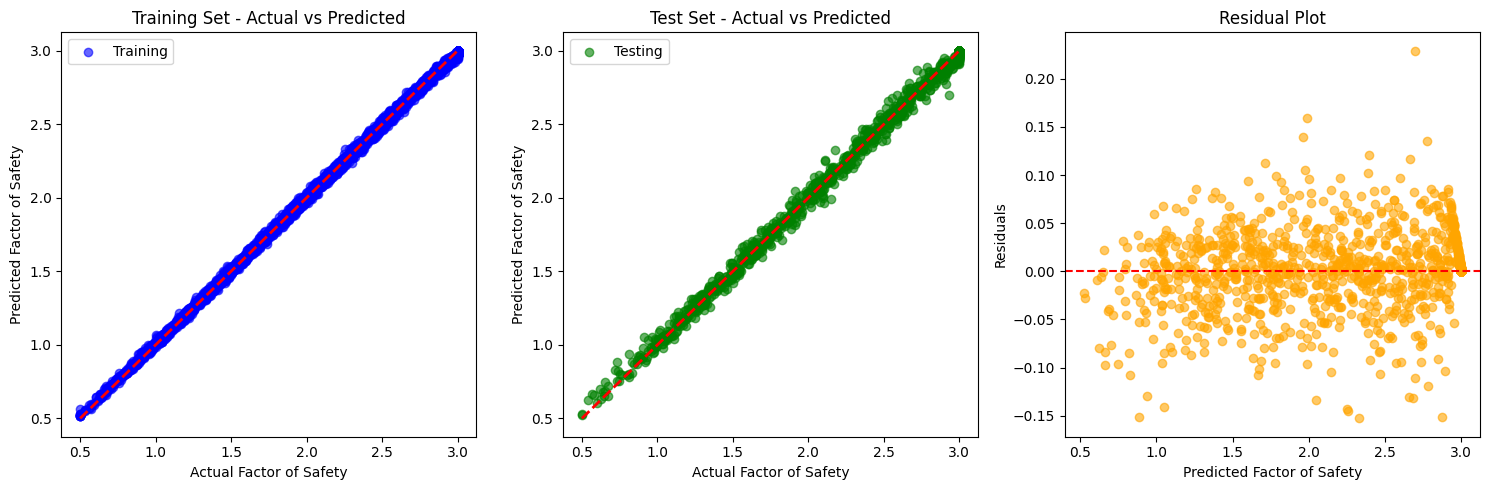


3. FEATURE IMPORTANCE (Tabular)
                    Feature  Importance
             Cohesion (kPa)    0.909128
Internal Friction Angle (°)    0.051349
  Pore Water Pressure Ratio    0.019213
            Slope Angle (°)    0.018558
      Reinforcement Numeric    0.000618
           Slope Height (m)    0.000571
        Unit Weight (kN/m³)    0.000562


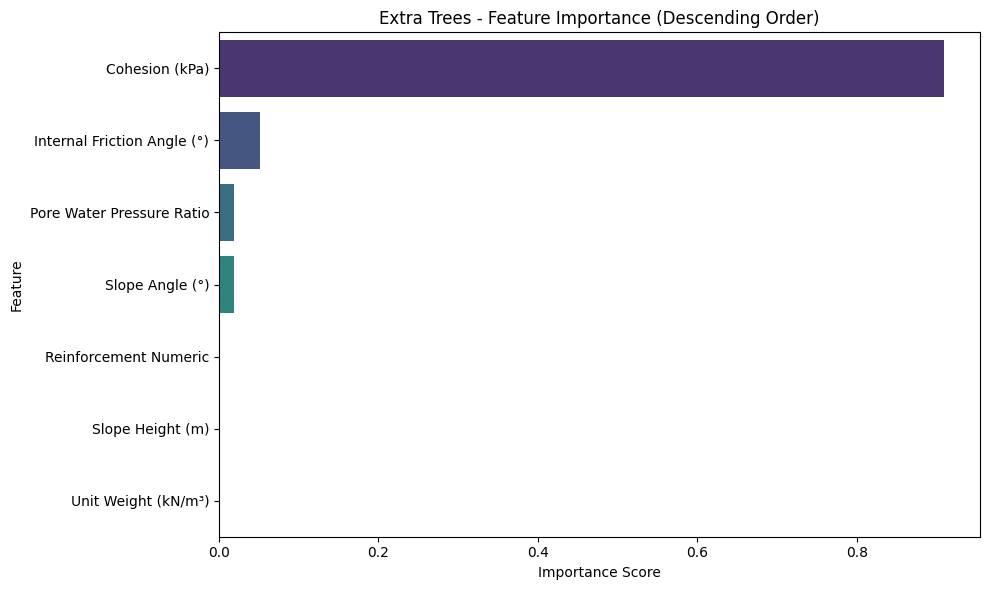


4. ACCURACY METRICS
            Metric  Training  Testing
              RMSE  0.011988 0.030442
               MAE  0.006544 0.016002
          R² Score  0.999671 0.997832
Execution Time (s)  1.075031 1.075031

5. P-VALUE ANALYSIS
P-Values for Features:
                    Feature       P_Value  Significant
             Cohesion (kPa)  0.000000e+00         True
Internal Friction Angle (°) 2.019107e-175         True
  Pore Water Pressure Ratio  5.999735e-86         True
            Slope Angle (°)  1.194833e-63         True
           Slope Height (m)  5.726001e-01        False
      Reinforcement Numeric  6.978170e-01        False
        Unit Weight (kN/m³)  9.679345e-01        False

6. COMBINED FEATURE ANALYSIS
Combined Feature Analysis (Importance + P-Value):
                    Feature  Importance       P_Value  Significant  Combined_Score
             Cohesion (kPa)    0.909128  0.000000e+00         True             1.0
Internal Friction Angle (°)    0.051349 2.019107e-175      

In [ ]:
# Extra Trees Regressor Analysis for Slope Stability Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sma
from scipy import stats
import time
import warnings
warnings.filterwarnings('ignore')

# Load your dataset (replace 'your_dataset.csv' with actual file path)
# df = pd.read_csv('your_dataset.csv')

# Feature columns (excluding target)
feature_cols = ['Unit Weight (kN/m³)', 'Cohesion (kPa)', 'Internal Friction Angle (°)',
                'Slope Angle (°)', 'Slope Height (m)', 'Pore Water Pressure Ratio',
                'Reinforcement Numeric']

# Prepare features and target
X = df[feature_cols]
y = df['Factor of Safety (FS)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_cols)

# Reset the index of X_train_scaled and y_train to ensure they are aligned for statsmodels
X_train_scaled = X_train_scaled.reset_index(drop=True)
# Reset the index of y_train to align with X_train_scaled for statsmodels OLS
y_train = y_train.reset_index(drop=True)


# 1. Train Extra Trees Regressor
print("=" * 60)
print("EXTRA TREES REGRESSOR ANALYSIS")
print("=" * 60)

start_time = time.time()
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42, max_depth=15, min_samples_split=5)
et_model.fit(X_train_scaled, y_train)
execution_time = time.time() - start_time

# Make predictions
y_pred_train = et_model.predict(X_train_scaled)
y_pred_test = et_model.predict(X_test_scaled)

# 2. Regression Curve
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_train, y_pred_train, alpha=0.6, color='blue', label='Training')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Factor of Safety')
plt.ylabel('Predicted Factor of Safety')
plt.title('Training Set - Actual vs Predicted')
plt.legend()

plt.subplot(1, 3, 2)
# Need to reset index of y_test as well for plotting against y_pred_test (which has a default index)
y_test_reset = y_test.reset_index(drop=True) # Also reset y_test for plotting and residual calculation
plt.scatter(y_test_reset, y_pred_test, alpha=0.6, color='green', label='Testing')
plt.plot([y_test_reset.min(), y_test_reset.max()], [y_test_reset.min(), y_test_reset.max()], 'r--', lw=2)
plt.xlabel('Actual Factor of Safety')
plt.ylabel('Predicted Factor of Safety')
plt.title('Test Set - Actual vs Predicted')
plt.legend()

plt.subplot(1, 3, 3)
# Calculate residuals using the reset index for y_test
residuals = y_test_reset - y_pred_test
plt.scatter(y_pred_test, residuals, alpha=0.6, color='orange')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Factor of Safety')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

# 3. Feature Importance Analysis
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': et_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n3. FEATURE IMPORTANCE (Tabular)")
print("=" * 50)
print(feature_importance.to_string(index=False))

# Feature Importance Graph
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Extra Trees - Feature Importance (Descending Order)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# 4. Calculate Accuracy Metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
# Use y_test_reset for metrics to ensure alignment
test_rmse = np.sqrt(mean_squared_error(y_test_reset, y_pred_test))
train_mae = mean_absolute_error(y_train, y_pred_train)
# Use y_test_reset for metrics to ensure alignment
test_mae = mean_absolute_error(y_test_reset, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
# Use y_test_reset for metrics to ensure alignment
test_r2 = r2_score(y_test_reset, y_pred_test)

# Create accuracy metrics table
accuracy_metrics = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R² Score', 'Execution Time (s)'],
    'Training': [train_rmse, train_mae, train_r2, execution_time],
    'Testing': [test_rmse, test_mae, test_r2, execution_time]
})

print("\n4. ACCURACY METRICS")
print("=" * 40)
print(accuracy_metrics.to_string(index=False))

# 5. P-value Analysis
print("\n5. P-VALUE ANALYSIS")
print("=" * 40)

# Use Linear Regression for p-value calculation (as tree models don't have built-in p-values)
# X_train_scaled and y_train now have aligned indices due to reset_index
X_with_constant = sma.add_constant(X_train_scaled)
ols_model = sma.OLS(y_train, X_with_constant).fit()
p_values = ols_model.pvalues[1:]  # Exclude intercept

# Create p-value dataframe
p_value_df = pd.DataFrame({
    'Feature': feature_cols,
    'P_Value': p_values.values,
    'Significant': p_values.values < 0.05
}).sort_values('P_Value')

print("P-Values for Features:")
print(p_value_df.to_string(index=False))

# 6. Combined Feature Selection Analysis
print("\n6. COMBINED FEATURE ANALYSIS")
print("=" * 50)

# Merge feature importance and p-values
combined_analysis = pd.merge(
    feature_importance,
    p_value_df[['Feature', 'P_Value', 'Significant']],
    on='Feature'
)

# Rank features based on importance and significance
combined_analysis['Importance_Rank'] = combined_analysis['Importance'].rank(ascending=False)
combined_analysis['PValue_Rank'] = combined_analysis['P_Value'].rank(ascending=True)
combined_analysis['Combined_Score'] = (combined_analysis['Importance_Rank'] + combined_analysis['PValue_Rank']) / 2
combined_analysis = combined_analysis.sort_values('Combined_Score')

print("Combined Feature Analysis (Importance + P-Value):")
print(combined_analysis[['Feature', 'Importance', 'P_Value', 'Significant', 'Combined_Score']].to_string(index=False))

# Select top features (p-value < 0.05 and high importance)
top_features = combined_analysis[
    (combined_analysis['Significant'] == True) &
    (combined_analysis['Importance'] > combined_analysis['Importance'].median())
]['Feature'].tolist()

print(f"\nTop Important Features (Significant p-value + High Importance):")
for i, feature in enumerate(top_features, 1):
    print(f"{i}. {feature}")

print(f"\nExtra Trees Model Performance Summary:")
print(f"- Test R² Score: {test_r2:.4f}")
print(f"- Test RMSE: {test_rmse:.4f}")
print(f"- Number of significant features: {len(top_features)}")
print(f"- Execution Time: {execution_time:.4f} seconds")

ADABOOST REGRESSOR ANALYSIS


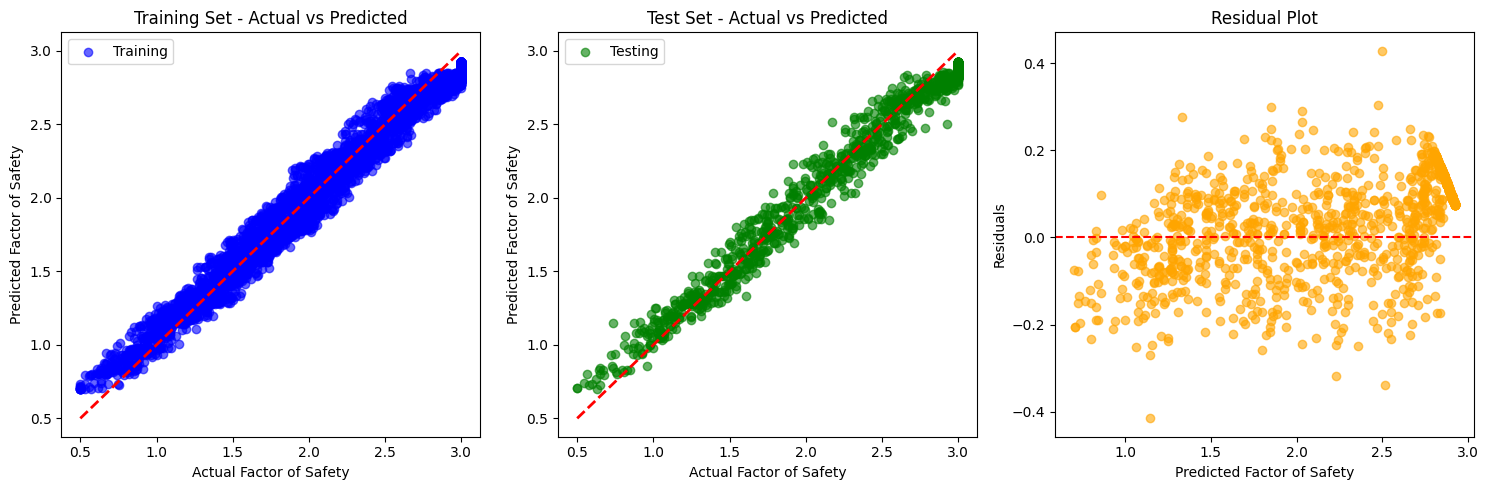


3. FEATURE IMPORTANCE (Tabular)
                    Feature  Importance
             Cohesion (kPa)    0.709046
Internal Friction Angle (°)    0.162462
  Pore Water Pressure Ratio    0.066018
            Slope Angle (°)    0.062473
        Unit Weight (kN/m³)    0.000000
           Slope Height (m)    0.000000
      Reinforcement Numeric    0.000000


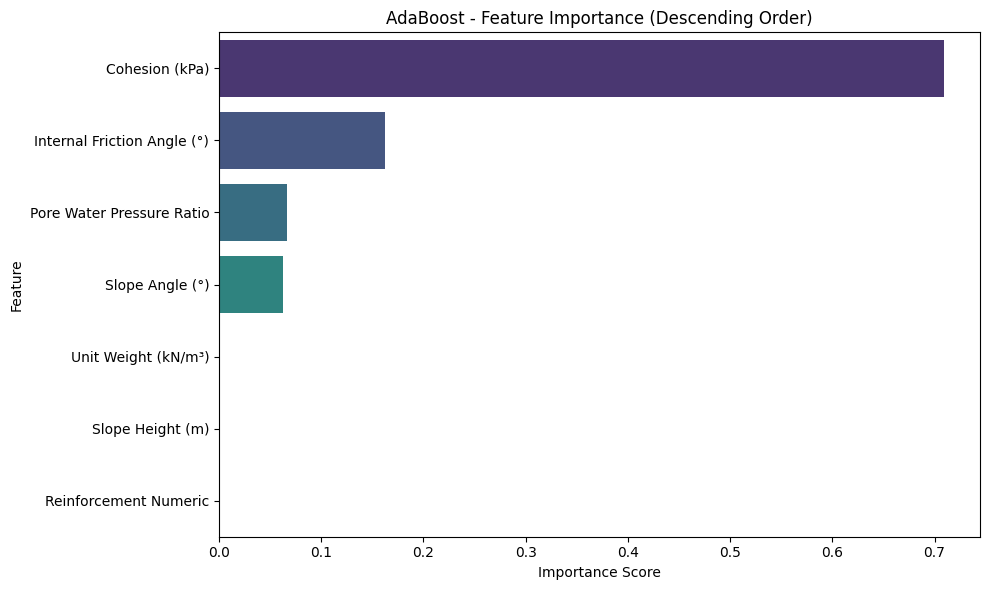


4. ACCURACY METRICS
            Metric  Training  Testing
              RMSE  0.119337 0.121375
               MAE  0.108413 0.109863
          R² Score  0.967447 0.965539
Execution Time (s)  2.826697 2.826697

5. P-VALUE ANALYSIS
P-Values for Features:
                    Feature       P_Value  Significant
             Cohesion (kPa)  0.000000e+00         True
Internal Friction Angle (°) 2.019107e-175         True
  Pore Water Pressure Ratio  5.999735e-86         True
            Slope Angle (°)  1.194833e-63         True
           Slope Height (m)  5.726001e-01        False
      Reinforcement Numeric  6.978170e-01        False
        Unit Weight (kN/m³)  9.679345e-01        False

6. COMBINED FEATURE ANALYSIS
Combined Feature Analysis (Importance + P-Value):
                    Feature  Importance       P_Value  Significant  Combined_Score
             Cohesion (kPa)    0.709046  0.000000e+00         True             1.0
Internal Friction Angle (°)    0.162462 2.019107e-175      

In [ ]:
# AdaBoost Regressor Analysis for Slope Stability Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sma
from scipy import stats
import time
import warnings
warnings.filterwarnings('ignore')

# Load your dataset (replace 'your_dataset.csv' with actual file path)
# df = pd.read_csv('your_dataset.csv')

# Feature columns (excluding target)
feature_cols = ['Unit Weight (kN/m³)', 'Cohesion (kPa)', 'Internal Friction Angle (°)',
                'Slope Angle (°)', 'Slope Height (m)', 'Pore Water Pressure Ratio',
                'Reinforcement Numeric']

# Prepare features and target
X = df[feature_cols]
y = df['Factor of Safety (FS)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_cols)

# Reset the index of X_train_scaled and y_train to ensure they are aligned for statsmodels
X_train_scaled = X_train_scaled.reset_index(drop=True)
# Reset the index of y_train to align with X_train_scaled for statsmodels OLS
y_train = y_train.reset_index(drop=True)


# 1. Train AdaBoost Regressor
print("=" * 60)
print("ADABOOST REGRESSOR ANALYSIS")
print("=" * 60)

start_time = time.time()
# Use DecisionTreeRegressor as base estimator with limited depth
base_estimator = DecisionTreeRegressor(max_depth=4, random_state=42)
ada_model = AdaBoostRegressor(
    estimator=base_estimator,
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)
ada_model.fit(X_train_scaled, y_train)
execution_time = time.time() - start_time

# Make predictions
y_pred_train = ada_model.predict(X_train_scaled)
y_pred_test = ada_model.predict(X_test_scaled)

# 2. Regression Curve
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_train, y_pred_train, alpha=0.6, color='blue', label='Training')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Factor of Safety')
plt.ylabel('Predicted Factor of Safety')
plt.title('Training Set - Actual vs Predicted')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_test, alpha=0.6, color='green', label='Testing')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Factor of Safety')
plt.ylabel('Predicted Factor of Safety')
plt.title('Test Set - Actual vs Predicted')
plt.legend()

plt.subplot(1, 3, 3)
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals, alpha=0.6, color='orange')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Factor of Safety')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

# 3. Feature Importance Analysis
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': ada_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n3. FEATURE IMPORTANCE (Tabular)")
print("=" * 50)
print(feature_importance.to_string(index=False))

# Feature Importance Graph
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('AdaBoost - Feature Importance (Descending Order)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# 4. Calculate Accuracy Metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Create accuracy metrics table
accuracy_metrics = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R² Score', 'Execution Time (s)'],
    'Training': [train_rmse, train_mae, train_r2, execution_time],
    'Testing': [test_rmse, test_mae, test_r2, execution_time]
})

print("\n4. ACCURACY METRICS")
print("=" * 40)
print(accuracy_metrics.to_string(index=False))

# 5. P-value Analysis
print("\n5. P-VALUE ANALYSIS")
print("=" * 40)

# Use Linear Regression for p-value calculation (as tree models don't have built-in p-values)
# X_train_scaled and y_train now have aligned indices due to reset_index
X_with_constant = sma.add_constant(X_train_scaled)
ols_model = sma.OLS(y_train, X_with_constant).fit() # Now y_train and X_with_constant have aligned indices
p_values = ols_model.pvalues[1:]  # Exclude intercept

# Create p-value dataframe
p_value_df = pd.DataFrame({
    'Feature': feature_cols,
    'P_Value': p_values.values,
    'Significant': p_values.values < 0.05
}).sort_values('P_Value')

print("P-Values for Features:")
print(p_value_df.to_string(index=False))

# 6. Combined Feature Selection Analysis
print("\n6. COMBINED FEATURE ANALYSIS")
print("=" * 50)

# Merge feature importance and p-values
combined_analysis = pd.merge(
    feature_importance,
    p_value_df[['Feature', 'P_Value', 'Significant']],
    on='Feature'
)

# Rank features based on importance and significance
combined_analysis['Importance_Rank'] = combined_analysis['Importance'].rank(ascending=False)
combined_analysis['PValue_Rank'] = combined_analysis['P_Value'].rank(ascending=True)
combined_analysis['Combined_Score'] = (combined_analysis['Importance_Rank'] + combined_analysis['PValue_Rank']) / 2
combined_analysis = combined_analysis.sort_values('Combined_Score')

print("Combined Feature Analysis (Importance + P-Value):")
print(combined_analysis[['Feature', 'Importance', 'P_Value', 'Significant', 'Combined_Score']].to_string(index=False))

# Select top features (p-value < 0.05 and high importance)
top_features = combined_analysis[
    (combined_analysis['Significant'] == True) &
    (combined_analysis['Importance'] > combined_analysis['Importance'].median())
]['Feature'].tolist()

print(f"\nTop Important Features (Significant p-value + High Importance):")
for i, feature in enumerate(top_features, 1):
    print(f"{i}. {feature}")

print(f"\nAdaBoost Model Performance Summary:")
print(f"- Test R² Score: {test_r2:.4f}")
print(f"- Test RMSE: {test_rmse:.4f}")
print(f"- Number of significant features: {len(top_features)}")
print(f"- Execution Time: {execution_time:.4f} seconds")

GRADIENT BOOSTING REGRESSOR ANALYSIS


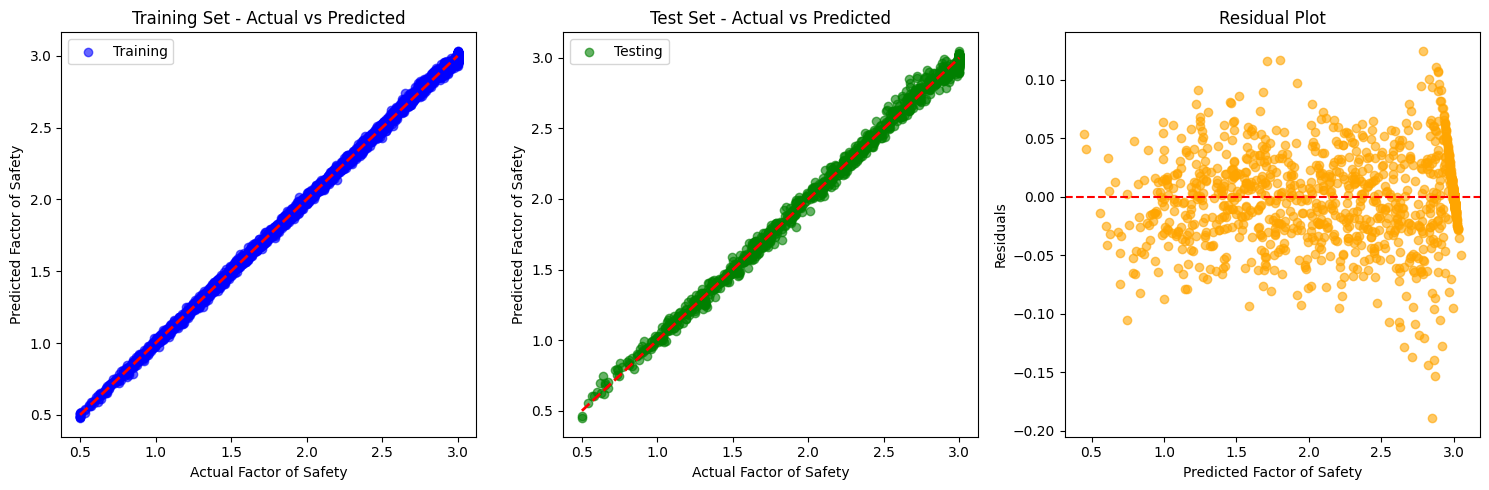


3. FEATURE IMPORTANCE (Tabular)
                    Feature  Importance
             Cohesion (kPa)    0.904381
Internal Friction Angle (°)    0.055456
            Slope Angle (°)    0.020183
  Pore Water Pressure Ratio    0.019900
           Slope Height (m)    0.000037
        Unit Weight (kN/m³)    0.000033
      Reinforcement Numeric    0.000010


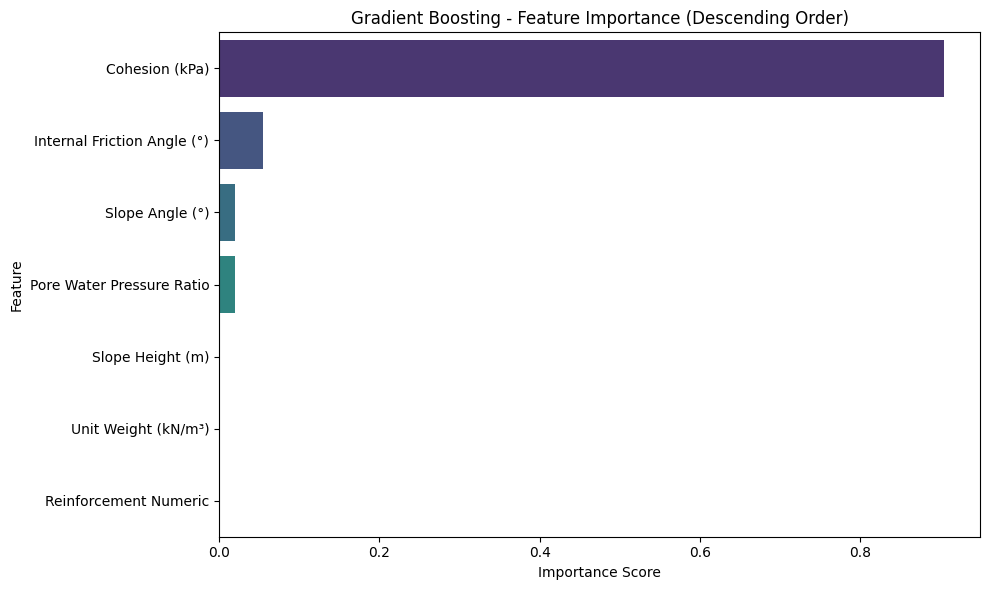


4. ACCURACY METRICS
            Metric  Training  Testing
              RMSE  0.013871 0.028866
               MAE  0.008173 0.016364
          R² Score  0.999560 0.998051
Execution Time (s)  5.774426 5.774426

5. P-VALUE ANALYSIS
P-Values for Features:
                    Feature       P_Value  Significant
             Cohesion (kPa)  0.000000e+00         True
Internal Friction Angle (°) 2.019107e-175         True
  Pore Water Pressure Ratio  5.999735e-86         True
            Slope Angle (°)  1.194833e-63         True
           Slope Height (m)  5.726001e-01        False
      Reinforcement Numeric  6.978170e-01        False
        Unit Weight (kN/m³)  9.679345e-01        False

6. COMBINED FEATURE ANALYSIS
Combined Feature Analysis (Importance + P-Value):
                    Feature  Importance       P_Value  Significant  Combined_Score
             Cohesion (kPa)    0.904381  0.000000e+00         True             1.0
Internal Friction Angle (°)    0.055456 2.019107e-175      

In [ ]:
# Gradient Boosting Regressor Analysis for Slope Stability Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sma
from scipy import stats
import time
import warnings
warnings.filterwarnings('ignore')

# Load your dataset (replace 'your_dataset.csv' with actual file path)
# df = pd.read_csv('your_dataset.csv')

# Feature columns (excluding target)
feature_cols = ['Unit Weight (kN/m³)', 'Cohesion (kPa)', 'Internal Friction Angle (°)',
                'Slope Angle (°)', 'Slope Height (m)', 'Pore Water Pressure Ratio',
                'Reinforcement Numeric']

# Prepare features and target
X = df[feature_cols]
y = df['Factor of Safety (FS)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_cols)

# Reset the index of X_train_scaled and y_train to ensure they are aligned for statsmodels
X_train_scaled = X_train_scaled.reset_index(drop=True)
# Reset the index of y_train to align with X_train_scaled for statsmodels OLS
y_train = y_train.reset_index(drop=True)


# 1. Train Gradient Boosting Regressor
print("=" * 60)
print("GRADIENT BOOSTING REGRESSOR ANALYSIS")
print("=" * 60)

start_time = time.time()
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    subsample=0.8
)
gb_model.fit(X_train_scaled, y_train)
execution_time = time.time() - start_time

# Make predictions
y_pred_train = gb_model.predict(X_train_scaled)
y_pred_test = gb_model.predict(X_test_scaled)

# 2. Regression Curve
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_train, y_pred_train, alpha=0.6, color='blue', label='Training')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Factor of Safety')
plt.ylabel('Predicted Factor of Safety')
plt.title('Training Set - Actual vs Predicted')
plt.legend()

plt.subplot(1, 3, 2)
# Need to reset index of y_test as well for plotting against y_pred_test (which has a default index)
y_test_reset = y_test.reset_index(drop=True) # Also reset y_test for plotting and residual calculation
plt.scatter(y_test_reset, y_pred_test, alpha=0.6, color='green', label='Testing')
plt.plot([y_test_reset.min(), y_test_reset.max()], [y_test_reset.min(), y_test_reset.max()], 'r--', lw=2)
plt.xlabel('Actual Factor of Safety')
plt.ylabel('Predicted Factor of Safety')
plt.title('Test Set - Actual vs Predicted')
plt.legend()

plt.subplot(1, 3, 3)
# Calculate residuals using the reset index for y_test
residuals = y_test_reset - y_pred_test
plt.scatter(y_pred_test, residuals, alpha=0.6, color='orange')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Factor of Safety')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

# 3. Feature Importance Analysis
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n3. FEATURE IMPORTANCE (Tabular)")
print("=" * 50)
print(feature_importance.to_string(index=False))

# Feature Importance Graph
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Gradient Boosting - Feature Importance (Descending Order)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# 4. Calculate Accuracy Metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
# Use y_test_reset for metrics to ensure alignment
test_rmse = np.sqrt(mean_squared_error(y_test_reset, y_pred_test))
train_mae = mean_absolute_error(y_train, y_pred_train)
# Use y_test_reset for metrics to ensure alignment
test_mae = mean_absolute_error(y_test_reset, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
# Use y_test_reset for metrics to ensure alignment
test_r2 = r2_score(y_test_reset, y_pred_test)

# Create accuracy metrics table
accuracy_metrics = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R² Score', 'Execution Time (s)'],
    'Training': [train_rmse, train_mae, train_r2, execution_time],
    'Testing': [test_rmse, test_mae, test_r2, execution_time]
})

print("\n4. ACCURACY METRICS")
print("=" * 40)
print(accuracy_metrics.to_string(index=False))

# 5. P-value Analysis
print("\n5. P-VALUE ANALYSIS")
print("=" * 40)

# Use Linear Regression for p-value calculation (as tree models don't have built-in p-values)
X_with_constant = sma.add_constant(X_train_scaled)
ols_model = sma.OLS(y_train, X_with_constant).fit() # Now y_train and X_with_constant have aligned indices
p_values = ols_model.pvalues[1:]  # Exclude intercept

# Create p-value dataframe
p_value_df = pd.DataFrame({
    'Feature': feature_cols,
    'P_Value': p_values.values,
    'Significant': p_values.values < 0.05
}).sort_values('P_Value')

print("P-Values for Features:")
print(p_value_df.to_string(index=False))

# 6. Combined Feature Selection Analysis
print("\n6. COMBINED FEATURE ANALYSIS")
print("=" * 50)

# Merge feature importance and p-values
combined_analysis = pd.merge(
    feature_importance,
    p_value_df[['Feature', 'P_Value', 'Significant']],
    on='Feature'
)

# Rank features based on importance and significance
combined_analysis['Importance_Rank'] = combined_analysis['Importance'].rank(ascending=False)
combined_analysis['PValue_Rank'] = combined_analysis['P_Value'].rank(ascending=True)
combined_analysis['Combined_Score'] = (combined_analysis['Importance_Rank'] + combined_analysis['PValue_Rank']) / 2
combined_analysis = combined_analysis.sort_values('Combined_Score')

print("Combined Feature Analysis (Importance + P-Value):")
print(combined_analysis[['Feature', 'Importance', 'P_Value', 'Significant', 'Combined_Score']].to_string(index=False))

# Select top features (p-value < 0.05 and high importance)
top_features = combined_analysis[
    (combined_analysis['Significant'] == True) &
    (combined_analysis['Importance'] > combined_analysis['Importance'].median())
]['Feature'].tolist()

print(f"\nTop Important Features (Significant p-value + High Importance):")
for i, feature in enumerate(top_features, 1):
    print(f"{i}. {feature}")

print(f"\nGradient Boosting Model Performance Summary:")
print(f"- Test R² Score: {test_r2:.4f}")
print(f"- Test RMSE: {test_rmse:.4f}")
print(f"- Number of significant features: {len(top_features)}")
print(f"- Execution Time: {execution_time:.4f} seconds")

XGBOOST REGRESSOR ANALYSIS


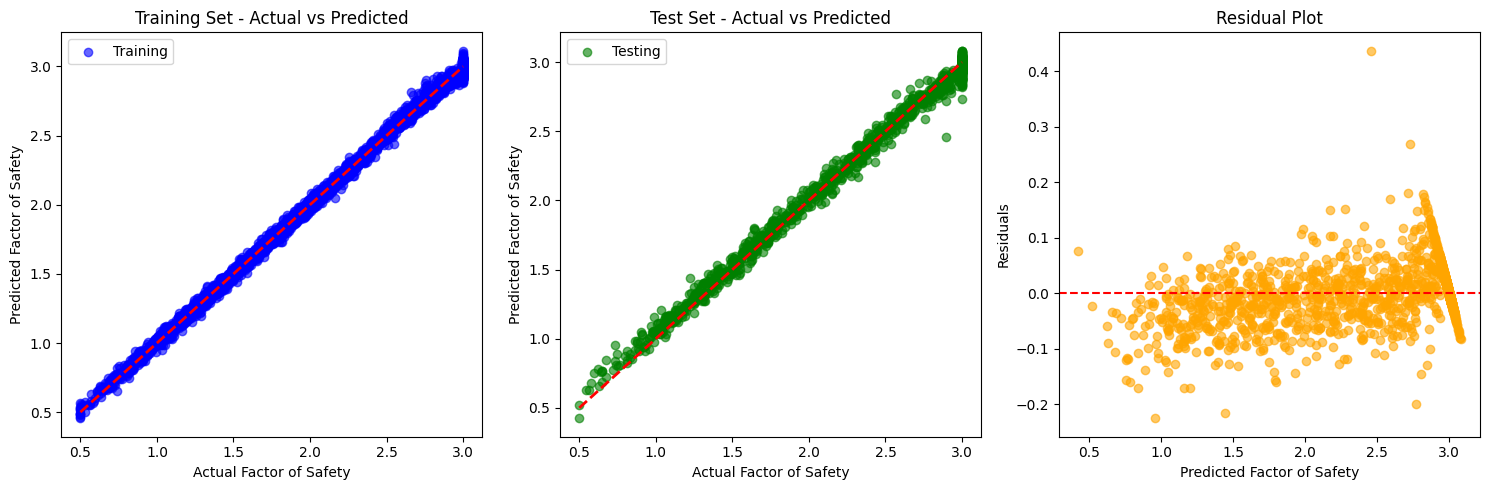


3. FEATURE IMPORTANCE (Tabular)
                    Feature  Importance
             Cohesion (kPa)    0.872533
Internal Friction Angle (°)    0.046444
  Pore Water Pressure Ratio    0.023188
            Slope Angle (°)    0.021094
           Slope Height (m)    0.013929
      Reinforcement Numeric    0.012956
        Unit Weight (kN/m³)    0.009857


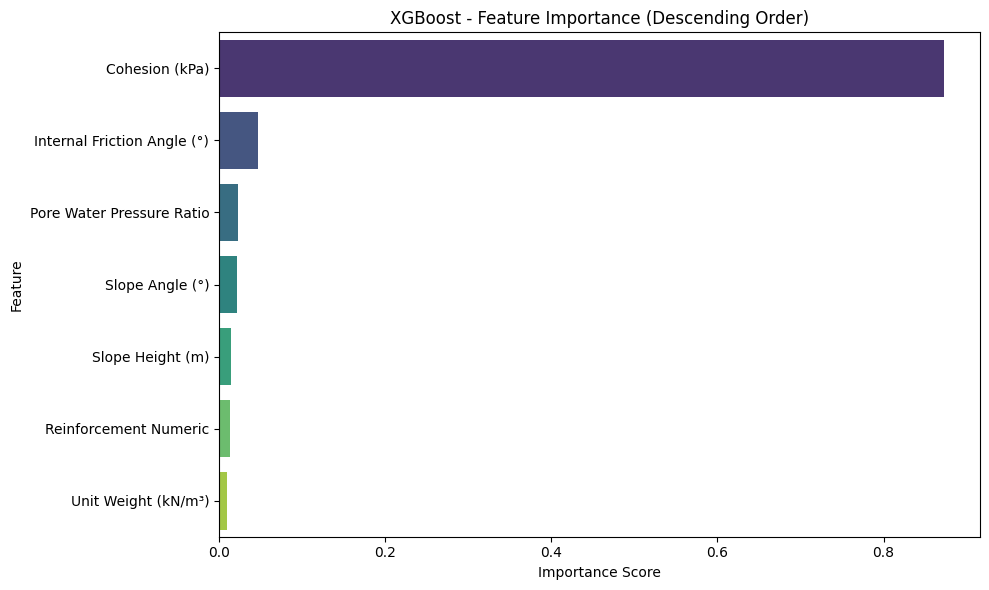

<Figure size 1000x600 with 0 Axes>

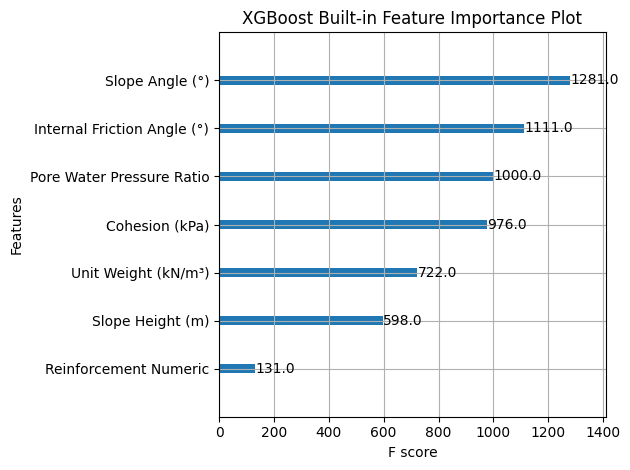


4. ACCURACY METRICS
            Metric  Training  Testing
              RMSE  0.025091 0.046802
               MAE  0.018901 0.032491
          R² Score  0.998561 0.994876
Execution Time (s)  1.115190 1.115190

5. P-VALUE ANALYSIS
P-Values for Features:
                    Feature       P_Value  Significant
             Cohesion (kPa)  0.000000e+00         True
Internal Friction Angle (°) 2.019107e-175         True
  Pore Water Pressure Ratio  5.999735e-86         True
            Slope Angle (°)  1.194833e-63         True
           Slope Height (m)  5.726001e-01        False
      Reinforcement Numeric  6.978170e-01        False
        Unit Weight (kN/m³)  9.679345e-01        False

6. COMBINED FEATURE ANALYSIS
Combined Feature Analysis (Importance + P-Value):
                    Feature  Importance       P_Value  Significant  Combined_Score
             Cohesion (kPa)    0.872533  0.000000e+00         True             1.0
Internal Friction Angle (°)    0.046444 2.019107e-175      

In [ ]:
# XGBoost Regressor Analysis for Slope Stability Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sma
from scipy import stats
import time
import warnings
warnings.filterwarnings('ignore')

# Install xgboost if not available: pip install xgboost
try:
    import xgboost as xgb
except ImportError:
    print("XGBoost not installed. Please install using: pip install xgboost")
    !pip install xgboost
    import xgboost as xgb # Import after installation
except Exception as e:
    print(f"An error occurred importing or installing xgboost: {e}")
    # Consider adding more robust error handling or exiting if xgboost is crucial

# Load your dataset (replace 'your_dataset.csv' with actual file path)
# df = pd.read_csv('your_dataset.csv')

# Feature columns (excluding target)
feature_cols = ['Unit Weight (kN/m³)', 'Cohesion (kPa)', 'Internal Friction Angle (°)',
                'Slope Angle (°)', 'Slope Height (m)', 'Pore Water Pressure Ratio',
                'Reinforcement Numeric']

# Prepare features and target
X = df[feature_cols]
y = df['Factor of Safety (FS)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_cols)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_cols)

# Reset the index of X_train_scaled and y_train to ensure they are aligned for statsmodels
X_train_scaled = X_train_scaled.reset_index(drop=True)
# Reset the index of y_train to align with X_train_scaled for statsmodels OLS
y_train = y_train.reset_index(drop=True)


# 1. Train XGBoost Regressor
print("=" * 60)
print("XGBOOST REGRESSOR ANALYSIS")
print("=" * 60)

start_time = time.time()
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror'
)
xgb_model.fit(X_train_scaled, y_train)
execution_time = time.time() - start_time

# Make predictions
y_pred_train = xgb_model.predict(X_train_scaled)
y_pred_test = xgb_model.predict(X_test_scaled)

# 2. Regression Curve
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_train, y_pred_train, alpha=0.6, color='blue', label='Training')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Factor of Safety')
plt.ylabel('Predicted Factor of Safety')
plt.title('Training Set - Actual vs Predicted')
plt.legend()

plt.subplot(1, 3, 2)
# Reset y_test index for plotting and residual calculation to ensure alignment with y_pred_test (which is a numpy array with default index)
y_test_reset = y_test.reset_index(drop=True)
plt.scatter(y_test_reset, y_pred_test, alpha=0.6, color='green', label='Testing')
plt.plot([y_test_reset.min(), y_test_reset.max()], [y_test_reset.min(), y_test_reset.max()], 'r--', lw=2)
plt.xlabel('Actual Factor of Safety')
plt.ylabel('Predicted Factor of Safety')
plt.title('Test Set - Actual vs Predicted')
plt.legend()

plt.subplot(1, 3, 3)
# Calculate residuals using the reset index for y_test
residuals = y_test_reset - y_pred_test
plt.scatter(y_pred_test, residuals, alpha=0.6, color='orange')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Factor of Safety')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

# 3. Feature Importance Analysis
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n3. FEATURE IMPORTANCE (Tabular)")
print("=" * 50)
print(feature_importance.to_string(index=False))

# Feature Importance Graph
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('XGBoost - Feature Importance (Descending Order)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# XGBoost built-in feature importance plot
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, max_num_features=len(feature_cols), importance_type='weight')
plt.title('XGBoost Built-in Feature Importance Plot')
plt.tight_layout()
plt.show()


# 4. Calculate Accuracy Metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
# Use y_test_reset for metrics to ensure alignment
test_rmse = np.sqrt(mean_squared_error(y_test_reset, y_pred_test))
train_mae = mean_absolute_error(y_train, y_pred_train)
# Use y_test_reset for metrics to ensure alignment
test_mae = mean_absolute_error(y_test_reset, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
# Use y_test_reset for metrics to ensure alignment
test_r2 = r2_score(y_test_reset, y_pred_test)

# Create accuracy metrics table
accuracy_metrics = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R² Score', 'Execution Time (s)'],
    'Training': [train_rmse, train_mae, train_r2, execution_time],
    'Testing': [test_rmse, test_mae, test_r2, execution_time]
})

print("\n4. ACCURACY METRICS")
print("=" * 40)
print(accuracy_metrics.to_string(index=False))

# 5. P-value Analysis
print("\n5. P-VALUE ANALYSIS")
print("=" * 40)

# Use Linear Regression for p-value calculation (as tree models don't have built-in p-values)
# X_train_scaled and y_train now have aligned indices due to reset_index
X_with_constant = sma.add_constant(X_train_scaled)
ols_model = sma.OLS(y_train, X_with_constant).fit()
p_values = ols_model.pvalues[1:]  # Exclude intercept

# Create p-value dataframe
p_value_df = pd.DataFrame({
    'Feature': feature_cols,
    'P_Value': p_values.values,
    'Significant': p_values.values < 0.05
}).sort_values('P_Value')

print("P-Values for Features:")
print(p_value_df.to_string(index=False))

# 6. Combined Feature Selection Analysis
print("\n6. COMBINED FEATURE ANALYSIS")
print("=" * 50)

# Merge feature importance and p-values
combined_analysis = pd.merge(
    feature_importance,
    p_value_df[['Feature', 'P_Value', 'Significant']],
    on='Feature'
)

# Rank features based on importance and significance
combined_analysis['Importance_Rank'] = combined_analysis['Importance'].rank(ascending=False)
combined_analysis['PValue_Rank'] = combined_analysis['P_Value'].rank(ascending=True)
combined_analysis['Combined_Score'] = (combined_analysis['Importance_Rank'] + combined_analysis['PValue_Rank']) / 2
combined_analysis = combined_analysis.sort_values('Combined_Score')

print("Combined Feature Analysis (Importance + P-Value):")
print(combined_analysis[['Feature', 'Importance', 'P_Value', 'Significant', 'Combined_Score']].to_string(index=False))

# Select top features (p-value < 0.05 and high importance)
top_features = combined_analysis[
    (combined_analysis['Significant'] == True) &
    (combined_analysis['Importance'] > combined_analysis['Importance'].median())
]['Feature'].tolist()

print(f"\nTop Important Features (Significant p-value + High Importance):")
for i, feature in enumerate(top_features, 1):
    print(f"{i}. {feature}")

print(f"\nXGBoost Model Performance Summary:")
print(f"- Test R² Score: {test_r2:.4f}")
print(f"- Test RMSE: {test_rmse:.4f}")
print(f"- Number of significant features: {len(top_features)}")
print(f"- Execution Time: {execution_time:.4f} seconds")

# Additional XGBoost specific analysis
print(f"\n7. XGBOOST SPECIFIC INSIGHTS")
print("=" * 50)

# Feature importance by different metrics
importance_types = ['weight', 'gain', 'cover']
for imp_type in importance_types:
    print(f"\nFeature Importance by {imp_type.upper()}:")
    # Ensure the model was trained and has a booster object
    if hasattr(xgb_model, 'get_booster'):
        try:
            imp_dict = xgb_model.get_booster().get_score(importance_type=imp_type)
            imp_df = pd.DataFrame(list(imp_dict.items()), columns=['Feature', f'{imp_type}_importance'])
            imp_df = imp_df.sort_values(f'{imp_type}_importance', ascending=False)
            print(imp_df.to_string(index=False))
        except xgb.core.XGBoostError as e:
            print(f"Could not get {imp_type} importance: {e}")
    else:
        print("XGBoost model does not have a booster object.")

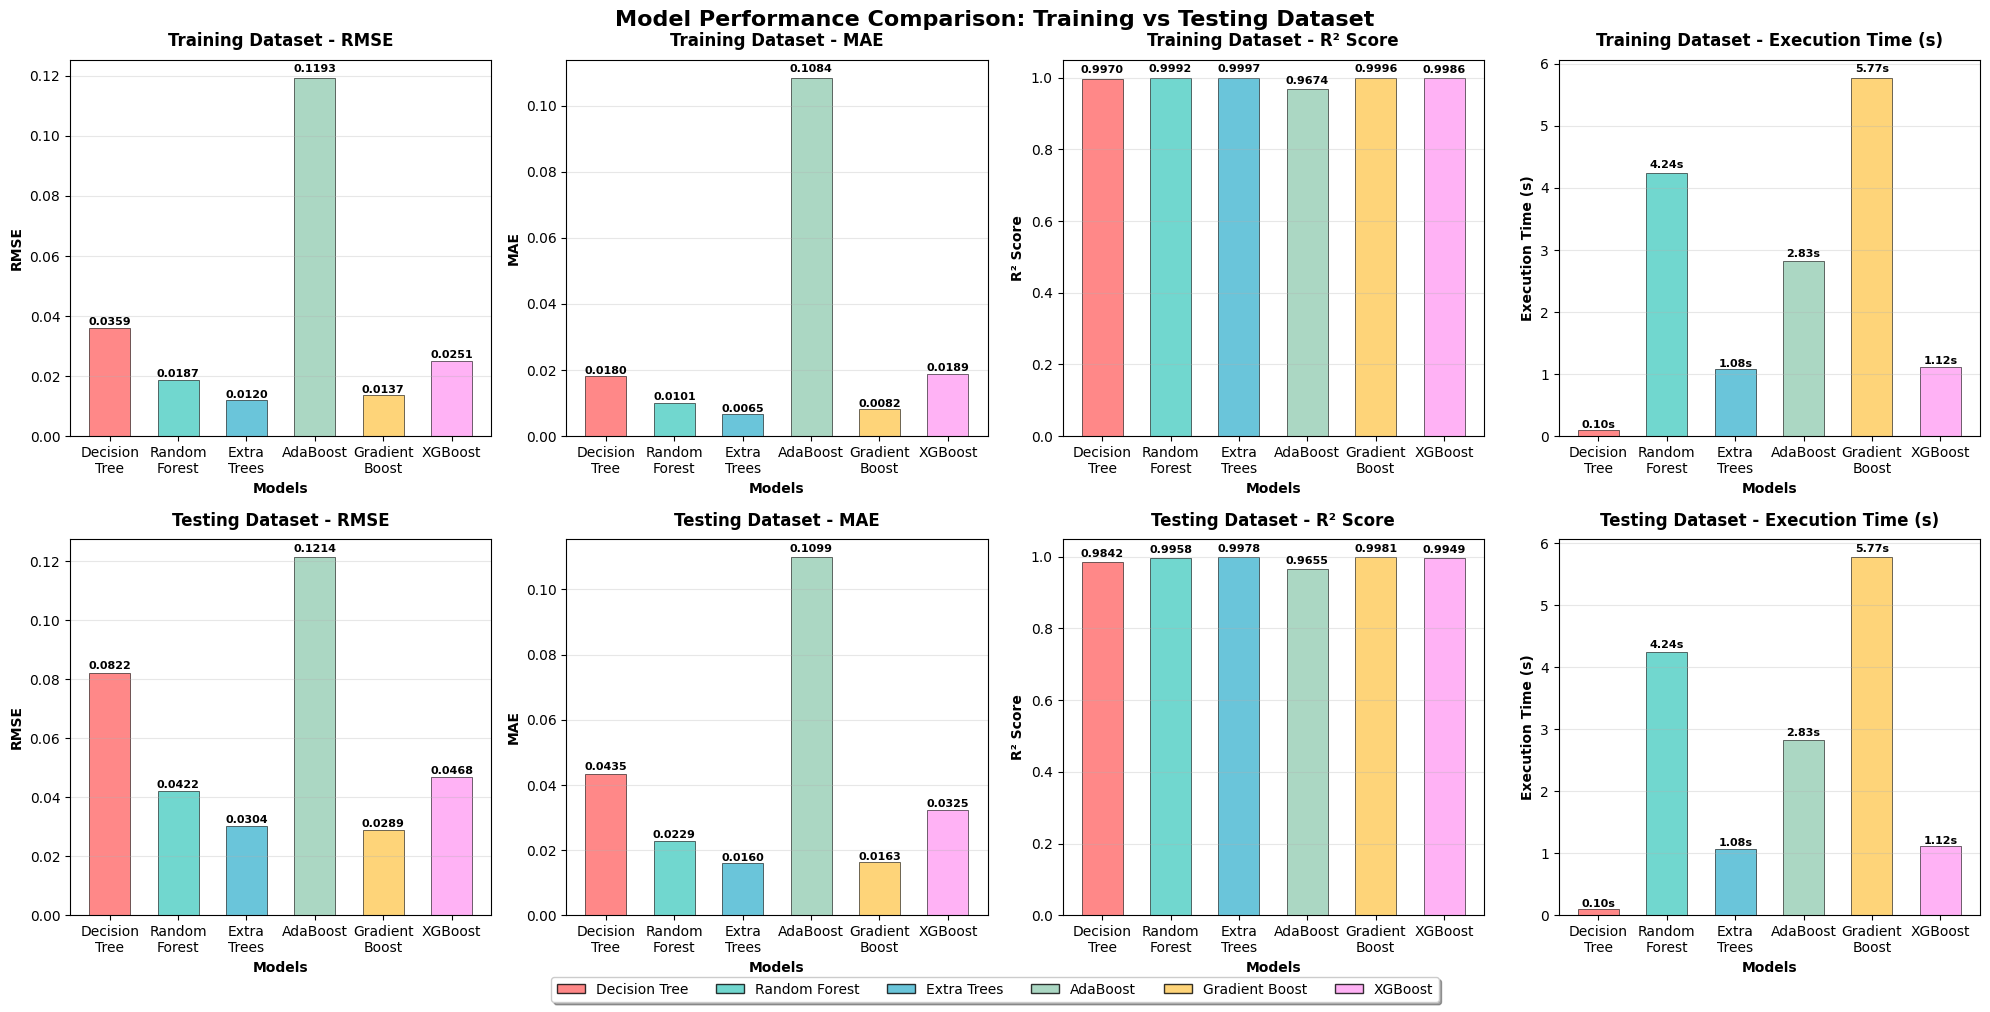

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data for Training Dataset
training_data = {
    'Decision Tree': {'RMSE': 0.035945, 'MAE': 0.018043, 'R² Score': 0.997047, 'Execution Time (s)': 0.101897},
    'Random Forest': {'RMSE': 0.018725, 'MAE': 0.010117, 'R² Score': 0.999199, 'Execution Time (s)': 4.243867},
    'Extra Trees': {'RMSE': 0.011988, 'MAE': 0.006544, 'R² Score': 0.999671, 'Execution Time (s)': 1.075031},
    'AdaBoost': {'RMSE': 0.119337, 'MAE': 0.108413, 'R² Score': 0.967447, 'Execution Time (s)': 2.826697},
    'Gradient Boost': {'RMSE': 0.013671, 'MAE': 0.008173, 'R² Score': 0.99956, 'Execution Time (s)': 5.774426},
    'XGBoost': {'RMSE': 0.025091, 'MAE': 0.018901, 'R² Score': 0.998561, 'Execution Time (s)': 1.11519}
}

# Data for Testing Dataset
testing_data = {
    'Decision Tree': {'RMSE': 0.08217, 'MAE': 0.043495, 'R² Score': 0.984206, 'Execution Time (s)': 0.101897},
    'Random Forest': {'RMSE': 0.042208, 'MAE': 0.022878, 'R² Score': 0.995833, 'Execution Time (s)': 4.243867},
    'Extra Trees': {'RMSE': 0.030442, 'MAE': 0.016002, 'R² Score': 0.997832, 'Execution Time (s)': 1.075031},
    'AdaBoost': {'RMSE': 0.121375, 'MAE': 0.109863, 'R² Score': 0.965539, 'Execution Time (s)': 2.826697},
    'Gradient Boost': {'RMSE': 0.028866, 'MAE': 0.016324, 'R² Score': 0.998051, 'Execution Time (s)': 5.774426},
    'XGBoost': {'RMSE': 0.046802, 'MAE': 0.032491, 'R² Score': 0.994876, 'Execution Time (s)': 1.11519}
}

# Model names
models = list(training_data.keys())

# Create figure with subplots (2 rows, 2 columns for each dataset)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Model Performance Comparison: Training vs Testing Dataset', fontsize=16, fontweight='bold')

# Colors for each model
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3']

# Bar width and positions
bar_width = 0.15
x_pos = np.arange(len(models))

# Metrics to plot
metrics = ['RMSE', 'MAE', 'R² Score', 'Execution Time (s)']

# Plot Training Dataset
for i, metric in enumerate(metrics):
    ax = axes[0, i]
    values = [training_data[model][metric] for model in models]
    bars = ax.bar(x_pos, values, bar_width*4, color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)

    ax.set_title(f'Training Dataset - {metric}', fontweight='bold', pad=10)
    ax.set_xlabel('Models', fontweight='bold')
    ax.set_ylabel(metric, fontweight='bold')
    ax.set_xticks(x_pos)
    ax.set_xticklabels([model.replace(' ', '\n') for model in models], rotation=0, ha='center')
    ax.grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{value:.4f}' if metric != 'Execution Time (s)' else f'{value:.2f}s',
                ha='center', va='bottom', fontsize=8, fontweight='bold')

# Plot Testing Dataset
for i, metric in enumerate(metrics):
    ax = axes[1, i]
    values = [testing_data[model][metric] for model in models]
    bars = ax.bar(x_pos, values, bar_width*4, color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)

    ax.set_title(f'Testing Dataset - {metric}', fontweight='bold', pad=10)
    ax.set_xlabel('Models', fontweight='bold')
    ax.set_ylabel(metric, fontweight='bold')
    ax.set_xticks(x_pos)
    ax.set_xticklabels([model.replace(' ', '\n') for model in models], rotation=0, ha='center')
    ax.grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{value:.4f}' if metric != 'Execution Time (s)' else f'{value:.2f}s',
                ha='center', va='bottom', fontsize=8, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.93)

# Add legend
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=colors[i], alpha=0.8, edgecolor='black')
                   for i in range(len(models))]
fig.legend(legend_elements, models, loc='upper center', bbox_to_anchor=(0.5, 0.02),
           ncol=6, fontsize=10, frameon=True, fancybox=True, shadow=True)

plt.show()
